In [21]:
#導入函式庫
import jieba
import jieba.analyse
import pandas as pd
import numpy
from collections import Counter

In [22]:
#測試結巴斷句功能
documents=['你好歡迎光臨請坐謝謝您的合作']

In [23]:
orgdata = pd.read_csv("tao.csv",index_col=0, encoding='big5') #将index_col设置为0，即指定第一列作为DataFrame的行索引
orgdata.head()

,類別,名稱,種類,公告日期,地址或位置
編號,,,,,
1,國定古蹟,大溪李騰芳古宅,宅第,74.8.19,桃園市大溪區月眉里9鄰月眉路198巷32號
2,國定古蹟,觀音白沙岬燈塔,燈塔,110.5.10,桃園市觀音區光明路216號
3,直轄市定古蹟,新屋范姜祖堂,祠堂,74.8.19,桃園市新屋區新生里中正路110巷9號
4,直轄市定古蹟,蘆竹五福宮,寺廟,74.8.19,桃園市蘆竹區五福里五福路1號
5,直轄市定古蹟,龍潭聖蹟亭,寺廟,74.8.19,桃園市龍潭區聖亭路


In [27]:
orgdata['seg'] = ""
orgdata.head()

,類別,名稱,種類,公告日期,地址或位置,seg
編號,,,,,,
1,國定古蹟,大溪李騰芳古宅,宅第,74.8.19,桃園市大溪區月眉里9鄰月眉路198巷32號,
2,國定古蹟,觀音白沙岬燈塔,燈塔,110.5.10,桃園市觀音區光明路216號,
3,直轄市定古蹟,新屋范姜祖堂,祠堂,74.8.19,桃園市新屋區新生里中正路110巷9號,
4,直轄市定古蹟,蘆竹五福宮,寺廟,74.8.19,桃園市蘆竹區五福里五福路1號,
5,直轄市定古蹟,龍潭聖蹟亭,寺廟,74.8.19,桃園市龍潭區聖亭路,


In [28]:
show_sub = orgdata['類別']=='歷史建築'
subdata = orgdata[show_sub]
subdata

,類別,名稱,種類,公告日期,地址或位置,seg
編號,,,,,,
29,歷史建築,大平橋,橋樑,92.10.15,桃園市龍潭區大平里打鐵坑溪,
30,歷史建築,龍潭烏樹林翁宅祖堂六桂傳香,宅第,92.10.15,桃園市龍潭區烏樹林里12鄰24號,
31,歷史建築,龍潭三和江夏科文祖堂,宅第,92.10.15,桃園市龍潭區5鄰泥橋子11號,
32,歷史建築,龍潭三坑川盛信記商店,宅第,92.10.15,桃園市龍潭區三坑里永福路135巷33號,
33,歷史建築,中壢聖蹟亭及東伯公,其他,93.1.5,桃園市中壢區延平路新街國小旁,
...,...,...,...,...,...,...
120,歷史建築,中原大學建築系館,學校,110.01.20,桃園市中壢區中北路200號,
121,歷史建築,專賣局臺北支局大溪樟腦收納場宿舍,宅第,110.03.02,桃園市大溪區,
122,歷史建築,龜山樟腦寮協和磚廠,產業及其他設施,110.9.23,桃園市龜山區文化一路688號,


In [29]:
jieba.load_userdict('cut.txt')
index = 0
#以斷詞的方式進行分割，接著進行排序，最後選取前 150 個詞彙作為關鍵詞。
for documents in subdata['名稱']: #從 csv. 檔中的欄位中找尋資料
    seg_list = jieba.analyse.extract_tags(str(documents), 150)
    subdata['seg'].iloc[index] = seg_list
    index += 1

C:\Users\Alex\AppData\Local\Temp\ipykernel_15704\1378793243.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Alex\AppData\Local\Temp\ipykernel_15704\1378793243.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Alex\AppData\Local\Temp\ipykernel_15704\1378793243.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Alex\AppData\Local\Temp\ipykernel_15704\1378793243.py:6: SettingWithCopyWarning:


A value is 

In [30]:
subdata_seg_list = subdata['seg'].tolist()
subdata_seg_list

[['大平'],
 ['祖堂', '龍潭', '烏樹林', '翁宅', '六桂傳香'],
 ['祖堂', '科文', '龍潭', '江夏'],
 ['龍潭', '坑川盛', '信記', '商店'],
 ['中壢', '伯公'],
 ['林宅', '梅鶴山莊', '大溪'],
 ['慈湖陵'],
 ['大溪'],
 ['和平路', '玉寶堂', '大溪'],
 ['Kenko', '大溪', '和平'],
 ['和平路', '協興', '大溪'],
 ['和平路', '永發', '大溪'],
 ['和平路', '廣大', '大溪'],
 ['和平路', '茂發', '大溪'],
 ['月眉', '通路'],
 ['和平路', '李記', '興源', '大溪'],
 ['和平路', '金記', '同興', '大溪'],
 ['和平路', '錦發', '大溪'],
 ['和平路', '金源', '大溪'],
 ['路隆泰', '大溪', '中央'],
 ['赤龍', '大溪', '中央'],
 ['廖宅', '大溪', '中央'],
 ['路翠鳳', '大溪', '中央'],
 ['公會堂', '大溪'],
 ['武德殿', '大溪'],
 ['大溪', '古道', '石板'],
 ['前龜', '山陸', '光三村', '活動', '中心'],
 ['中壢馬祖', '新村'],
 ['中壢', '國小', '日式', '新街', '宿舍'],
 ['吊橋', '溪口'],
 ['佐久間', '總督', '追懷紀念碑', '台基'],
 ['分站', '大溪', '工作站', '竹林', '招待所', '管理'],
 ['基國派', '教堂'],
 ['農會', '倉庫', '新屋'],
 ['角板', '山賓館'],
 ['八德', '三元'],
 ['角板', '風閣'],
 ['龜山', '憲光二村'],
 ['八德', '喻竹居'],
 ['八德', '正堂'],
 ['桃園', '大樹林橋'],
 ['國小', '日式', '大溪', '宿舍'],
 ['黃繼', '公墓'],
 ['龍潭', '武德殿'],
 ['148', '大溪', '中央'],
 ['德林', '奇珍', '古墓'],
 ['八德', '呂達川', '祠堂'],
 ['太武', '大溪'

In [31]:
flat = [x for sublist in subdata_seg_list for x in sublist]
diction = Counter(flat)
diction

Counter({'大平': 1,
         '祖堂': 2,
         '龍潭': 4,
         '烏樹林': 1,
         '翁宅': 1,
         '六桂傳香': 1,
         '科文': 1,
         '江夏': 2,
         '坑川盛': 1,
         '信記': 1,
         '商店': 1,
         '中壢': 6,
         '伯公': 1,
         '林宅': 1,
         '梅鶴山莊': 1,
         '大溪': 35,
         '慈湖陵': 1,
         '和平路': 12,
         '玉寶堂': 1,
         'Kenko': 1,
         '和平': 1,
         '協興': 1,
         '永發': 1,
         '廣大': 1,
         '茂發': 1,
         '月眉': 1,
         '通路': 1,
         '李記': 1,
         '興源': 1,
         '金記': 1,
         '同興': 1,
         '錦發': 1,
         '金源': 1,
         '路隆泰': 1,
         '中央': 5,
         '赤龍': 1,
         '廖宅': 1,
         '路翠鳳': 1,
         '公會堂': 1,
         '武德殿': 2,
         '古道': 1,
         '石板': 1,
         '前龜': 1,
         '山陸': 1,
         '光三村': 1,
         '活動': 1,
         '中心': 2,
         '中壢馬祖': 1,
         '新村': 3,
         '國小': 2,
         '日式': 9,
         '新街': 1,
         '宿舍': 17,
         '吊橋': 2,
      

In [32]:
words = list(orgdata['類別'])
show_key = pd.DataFrame(Counter(words).keys())
show_values = pd.DataFrame(Counter(words).values())
df = [show_key, show_values]
df

[             0
 0         國定古蹟
 1       直轄市定古蹟
 2         歷史建築
 3         文化景觀
 4         考古遺址
 5       傳統表演藝術
 6       重要傳統工藝
 7         傳統工藝
 8           民俗
 9       重要口述傳統
 10        口述傳統
 11  重要保存技術及保存者,
      0
 0    2
 1   26
 2   96
 3    4
 4    1
 5    6
 6    1
 7    4
 8    2
 9    1
 10   2
 11   1]

In [33]:
result = pd.concat(df, axis=1)   # concat 裡的 axis 預設是 0，也就是你的資料是會往下長。設成1，是想讓資料往橫的方向長。
result.columns = ['類別', '數量']
result.head()

,類別,數量
0,國定古蹟,2
1,直轄市定古蹟,26
2,歷史建築,96
3,文化景觀,4
4,考古遺址,1


In [34]:
import numpy as np

flat = [x for sublist in subdata_seg_list for x in sublist]
diction = Counter(flat)
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
mask = np.array(Image.open("taoyuan.jfif"))
font = "C:\Windows\Fonts\MSJH.TTC"

In [35]:
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

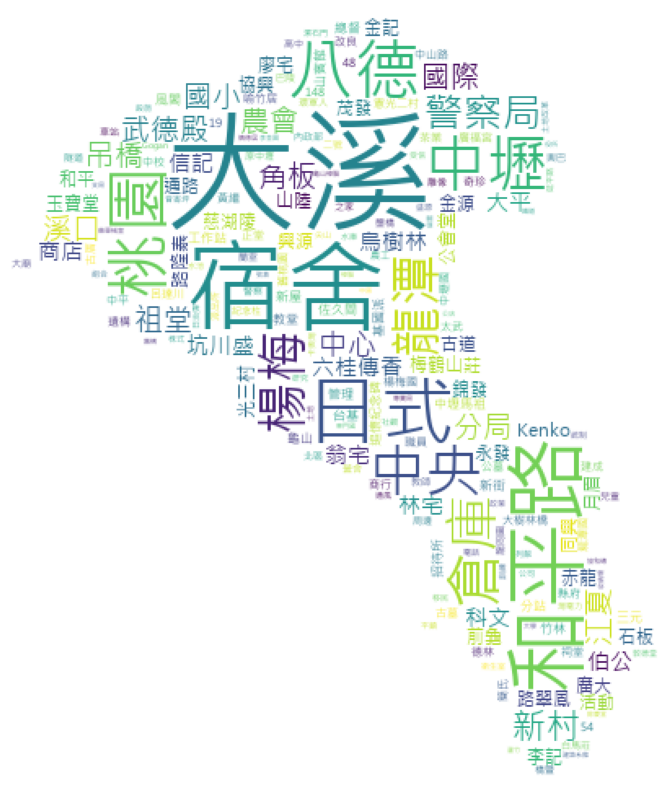

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()